### Часть 2. Работа с данными.
В первой части выполнена проверка распределений поступающих   каждую минуту данных температуры с датчиков в обжиговой машина, которая  представляет собой агрегат, состоящий из 5 одинаковых по размеру камер, в каждой камере установлено по 3 датчика температур. Установлено, что распределения близки к нормальным. Проверены распределения о высоте слоя сырья и его влажности. Высота слоя  имеет распределение близкое к равномерному, а влажность близкое к нормальному. Также изучено распределение качества - нормальное. 
Напомним, что высота слоя и влажность измеряются при входе сырья в машину. Сырье проходит через обжиговую машину за час.
Учитывая эти факты, данные усреднены  в интервале X:00 - X:59, где X некоторый час, а также заменены на медианное значение  выбросы в данных находящиеся за пределами 3 сигма.

* **T_data_1_1** - 1-й датчик в 1-й камере
* **T_data_1_2** - 2-й датчик в 1-й камере
* **T_data_1_3** -	3-й датчик в 1-й камере
* **T_data_2_1** -	1-й датчик во 2-й камере
* **T_data_2_2** -	2-й датчик во 2-й камере
* **T_data_2_3** -	3-й датчик во 2-й камере
* **T_data_3_1** -	1-й датчик в 3-й камере
* **T_data_3_2** -	2-й датчик в 3-й камере
* **T_data_3_3** -	3-й датчик в 3-й камере
* **T_data_4_1** -	1-й датчик в 4-й камере
* **T_data_4_2** -	2-й датчик в 4-й камере
* **T_data_4_3** -	3-й датчик в 4-й камере
* **T_data_5_1** -	1-й датчик в 5-й камере
* **T_data_5_2** -	2-й датчик в 5-й камере
* **T_data_5_3** -	3-й датчик в 5-й камере
* **H_data**     - Высота слоя 
* **AH_data**    -	Влажность сырья

Данные train после обработки  : train_final.csv

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy.stats import norm
import seaborn as sns
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')

%matplotlib inline

In [202]:
pd.set_option("display.precision", 3)
#pd.set_option('max_colwidth', 100)
pd.set_option('display.width', 500)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 25)
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

### Подготовим массив train  = x_train + y_train

In [203]:
train = pd.read_csv('train_final.csv', sep=';')
train['D1'] = pd.to_datetime(train['D1'], dayfirst=True)
train['D2'] = pd.to_datetime(train['D2'], dayfirst=True)
train['DT'] = pd.to_datetime(train['DT'], dayfirst=True)

In [204]:
keys = train.columns
sampleX = train[keys[4:]]
sampleX

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,271.22,306.95,266.87,328.80,329.12,345.08,501.33,499.20,583.78,320.12,360.68,336.33,232.38,236.60,242.05,155.85,4.73
1,277.58,300.37,273.55,320.48,331.97,355.45,501.90,501.65,535.85,330.23,387.13,336.32,231.85,237.68,236.52,156.45,7.90
2,273.60,231.83,266.80,322.70,334.22,347.13,501.13,500.37,563.52,341.55,398.68,334.35,237.02,245.68,231.97,156.00,6.96
3,250.33,227.03,256.35,326.58,333.67,317.72,511.18,498.12,492.37,345.35,395.07,332.23,248.85,254.15,244.78,156.05,7.29
4,240.40,239.35,249.25,325.75,325.40,310.50,522.68,498.97,538.72,341.28,379.88,337.82,260.00,260.52,248.55,188.48,7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17400,267.43,271.85,261.00,381.67,386.83,394.63,550.92,555.88,563.30,371.40,371.93,373.35,285.52,290.58,311.55,197.20,8.50
17401,265.57,271.27,263.48,382.20,388.82,404.65,564.93,573.42,573.80,349.60,356.65,303.98,281.25,284.33,284.60,196.59,5.98
17402,266.73,272.15,268.50,385.67,393.40,406.63,575.72,581.77,580.02,343.18,348.17,350.00,272.33,274.95,272.73,196.90,6.79
17403,268.83,276.73,261.97,382.78,384.85,387.75,579.52,580.85,583.78,361.30,343.08,350.00,259.95,256.53,262.37,196.49,7.14


In [205]:
sampleY = train[keys[3]]
sampleY

0        392
1        384
2        393
3        399
4        400
        ... 
17400    404
17401    395
17402    377
17403    368
17404    357
Name: QV, Length: 17405, dtype: int64

In [206]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
X_tr, X_val, y_tr, y_val = train_test_split(sampleX, sampleY, test_size=0.20, random_state=42)

In [207]:
lr = LinearRegression()
lr.fit(X_tr, y_tr)
y_pred_lr = lr.predict(X_val)
mean_absolute_error(y_pred_lr, y_val)
#print(lr.coef_)

10.922078629340268

In [208]:
re =r2_score(y_pred_lr, y_val)
re

0.8850447641108674

In [209]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [210]:
y_pred_lr = lr.predict(sampleX)
mean_absolute_error(y_pred_lr, sampleY)

11.03187479311327

In [211]:
re =r2_score(y_pred_lr, sampleY)
re

0.8842876386383852

### Оценка значимости уравнения линейной регрессии

Оценить статистическую значимость уравнения линейной регрессии в целом можно с помощью __F-критерия Фишера__. Проверяется нулевая гипотеза о том, что все коэффициенты при факторах у регрессионной модели равны нулю (т.е. модель представляет из себя горизонтальную плоскость.)

Используемая здесь статистика:
$$F = \dfrac{R^2 / k}{(1 - R^2) / (n - k - 1)},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $k$ — число факторов. В литературе часто используются обозначения $k_1 = k$, $k_2 = n - k - 1$ (иногда вместо $k_1$, $k_2$ пишут также $f_1$, $f_2$).

In [212]:
f1 = len(keys)
f2 = len(sampleX)-f1-1
f1,f2

(21, 17383)

In [213]:
F = re/f2/((1-re)/f2)
F

7.642119028881297

In [214]:
alpha = 0.05
from scipy import stats
F_crit = stats.f.ppf(1 - alpha, f1, f2)
F_crit

1.5563533408502936

Имеем $F > F_{crit}$, поэтому уравнение регрессии статистически значимо.


In [215]:
coef = lr.coef_

In [216]:
lr.intercept_

474.79156629544997

In [217]:
Sost = np.sqrt(np.sum((y_pred_lr - sampleY)**2)/(len(y_pred_lr)-2))
Sost

14.800400709303013

In [218]:
t = stats.t.ppf(0.975, len(y_pred_lr)-2) #статистика T
t

1.9601003077845138

Посмотрим на коэффициенты уравнения множественной регрессии

In [227]:
pd.set_option('display.float_format', lambda x: '%.6f' % x) 
x_keys = sampleX.keys()
xk = pd.DataFrame(x_keys, columns = ['name'])
b = pd.DataFrame(lr.coef_, columns = ['val'])
b.insert(0, "name", xk['name'], False)
b.loc[b.index.min() - 1] = ['intercept', lr.intercept_]
b = b.sort_index()
b = b.reset_index(drop=True)
b

,name,val
0,intercept,474.791566
1,T_data_1_1,0.121709
2,T_data_1_2,0.114931
3,T_data_1_3,0.111969
4,T_data_2_1,0.066422
5,T_data_2_2,0.043237
6,T_data_2_3,0.075004
7,T_data_3_1,-0.312578
8,T_data_3_2,-0.277236
9,T_data_3_3,-0.273728


Построим матрицу X

In [228]:
A = np.array(sampleX)
A = np.vstack((np.ones(A.shape[0]), A.T)).T
A.shape
A

array([[  1.        , 271.21666667, 306.95      , ..., 242.05      ,
        155.85416667,   4.73      ],
       [  1.        , 277.58333333, 300.36666667, ..., 236.51666667,
        156.4465    ,   7.9       ],
       [  1.        , 273.6       , 231.83333333, ..., 231.96666667,
        156.00016667,   6.96      ],
       ...,
       [  1.        , 266.73333333, 272.15      , ..., 272.73333333,
        196.89716667,   6.79      ],
       [  1.        , 268.83333333, 276.73333333, ..., 262.36666667,
        196.49366667,   7.14      ],
       [  1.        , 242.81666667, 276.56666667, ..., 246.16666667,
        187.06666667,   7.79      ]])

In [229]:
aa = np.dot(A.T, A)
aa.shape

(18, 18)

Найдем доверительный интервал  доверительный интервал для коэффициентов  регресии. 
__Используем формулу__ :
$$Se{(b_j)} = MEAN\sqrt{A_{jj}}.$$

In [230]:
с = np.linalg.inv(aa)
c = np.sqrt(с)

In [231]:
x_keys = b['name']
#print(x_keys)
j = 0
for key in x_keys:
    b.loc[b['name'] == key, 's']= Sost*c[j,j]
    b.loc[b['name'] == key, 'xdi_1']= b.loc[b['name'] == key, 'val' ] - c[j,j]*t
    b.loc[b['name'] == key, 'xdi_2']= b.loc[b['name'] == key, 'val' ] + c[j,j]*t
    j +=1
b
# xdi_1 и xdi_2 соотвественно левая и правая границы доверительного интервала

,name,val,s,xdi_1,xdi_2
0,intercept,474.791566,3.368507,474.345456,475.237677
1,T_data_1_1,0.121709,0.008541,0.120578,0.122841
2,T_data_1_2,0.114931,0.008644,0.113786,0.116075
3,T_data_1_3,0.111969,0.008580,0.110832,0.113105
4,T_data_2_1,0.066422,0.005898,0.065641,0.067203
5,T_data_2_2,0.043237,0.005983,0.042444,0.044029
6,T_data_2_3,0.075004,0.006174,0.074186,0.075822
7,T_data_3_1,-0.312578,0.004278,-0.313144,-0.312011
8,T_data_3_2,-0.277236,0.004173,-0.277788,-0.276683
9,T_data_3_3,-0.273728,0.004162,-0.274279,-0.273177


In [232]:
lr.coef_= b['xdi_1'][1:]

In [233]:
ypred2=lr.predict(sampleX)

In [234]:
lr.coef_= b['xdi_2'][1:]

In [235]:
ypred3=lr.predict(sampleX)

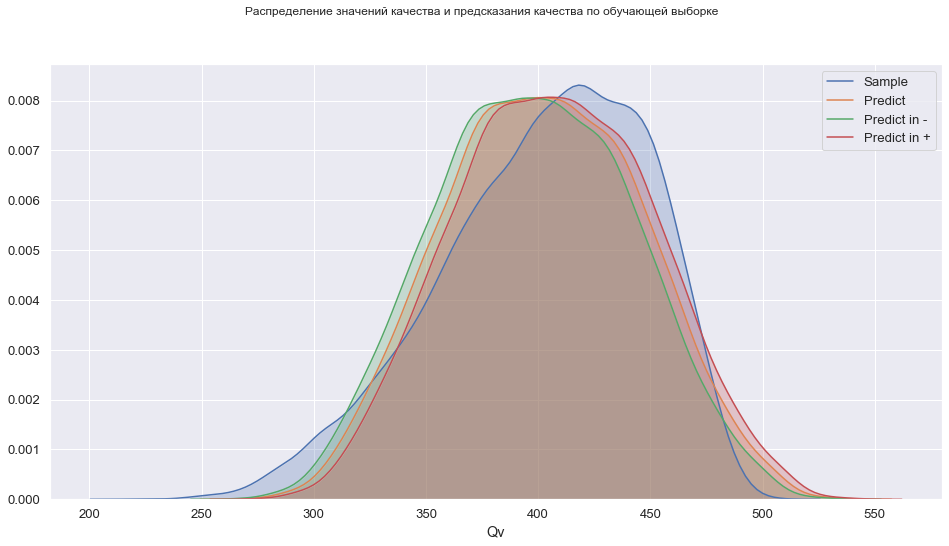

In [236]:
plt.figure(figsize = (16, 8))
labels = ['Sample', 'Predict']
l1 = sns.kdeplot(sampleY, shade=True, legend=1, label = 'Sample')
l2 = sns.kdeplot(y_pred_lr, shade=True, legend=1,  label = 'Predict')
l3 = sns.kdeplot(ypred2, shade=True, legend=1,  label = 'Predict in -')
l3 = sns.kdeplot(ypred3, shade=True, legend=1,  label = 'Predict in +')
plt.xlabel('Qv')
plt.suptitle('Распределение значений качества и предсказания качества по обучающей выборке')
plt.show()

In [237]:
sampleY.mean()

402.38873886814133

In [238]:
y_pred_lr.mean()

402.3858631986207

In [239]:
sampleY.std()

45.926863827260426

In [240]:
y_pred_lr.std()

43.50695031376498

Вывод: полученные коэффициенты уравнения линейной регрессии хорошо апроксимирую  данные, несмотря на значительное сокращение первоначальных данных.